In [2]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#read the data file
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

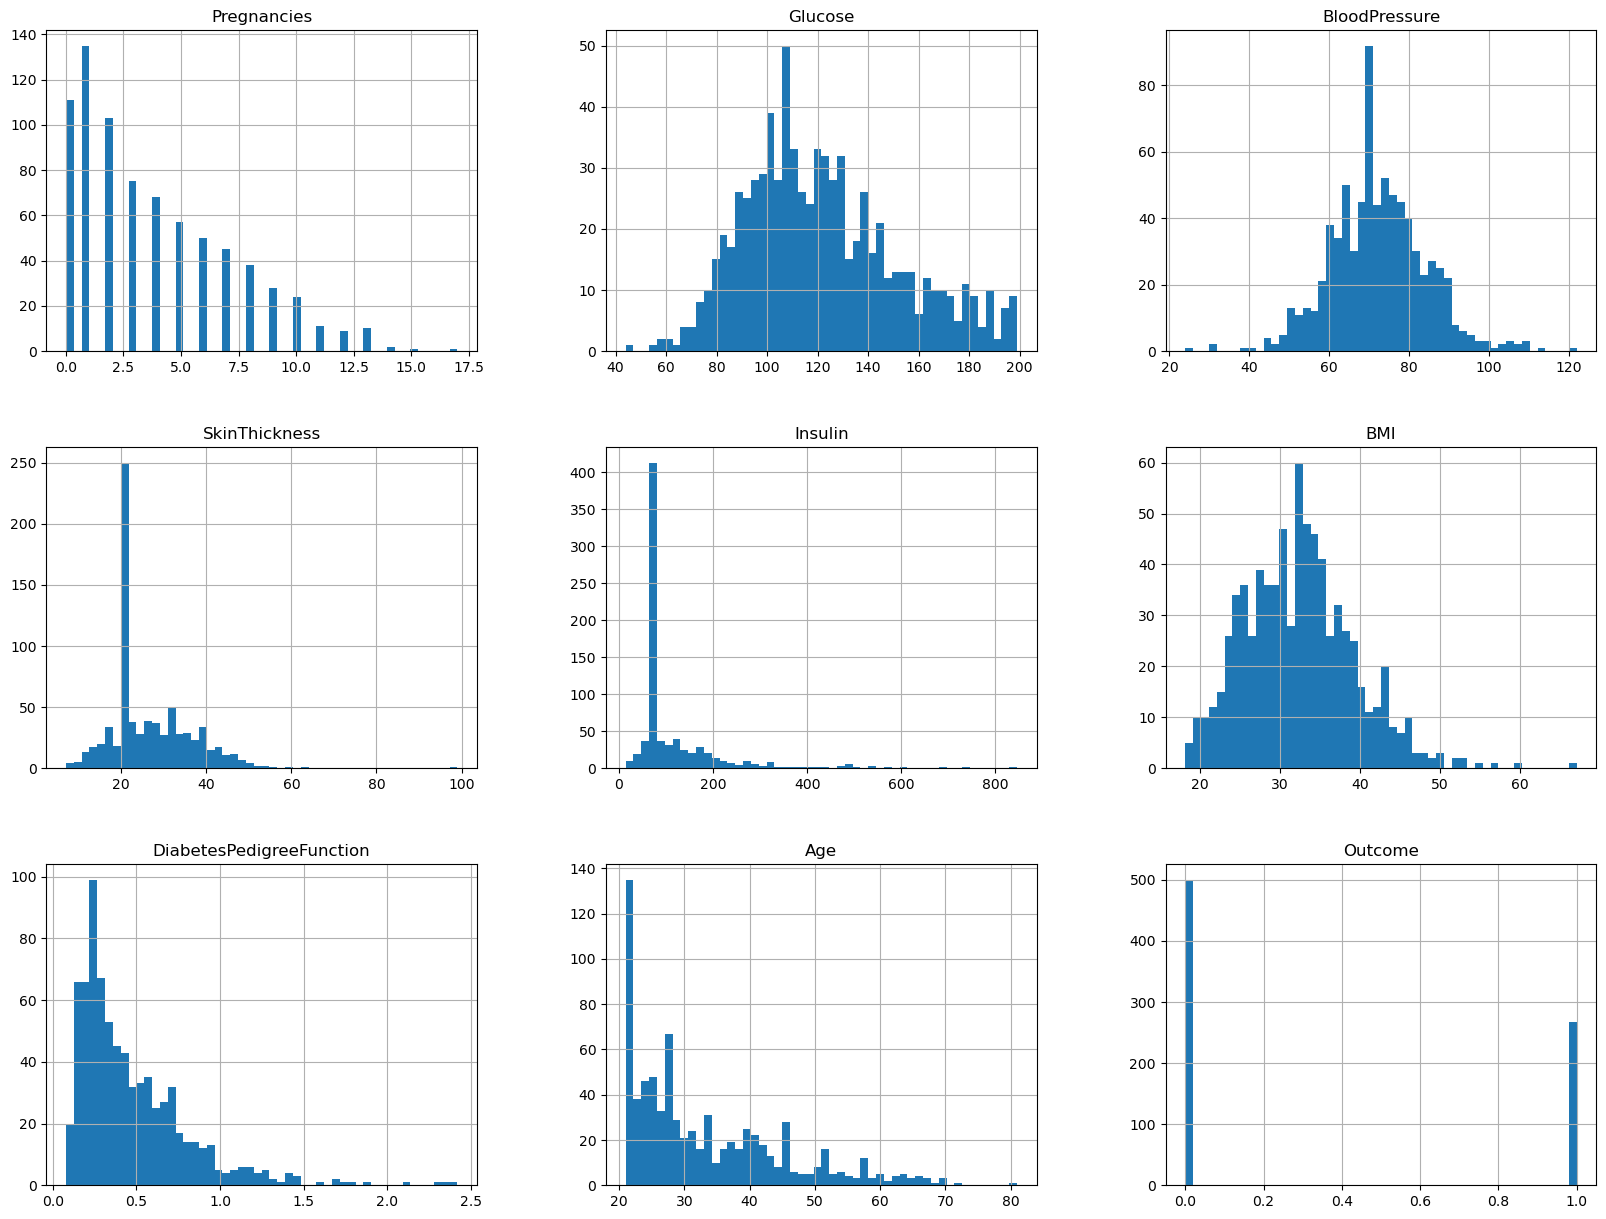

In [33]:
data.hist(bins=50, figsize=(20,15)) 
plt.show()

In [8]:
#this dataset have few misconception like the min value BloodPressure,Glucose,SkinThickness,BMI,Insulin can't be zero
#now replace this zero value with the mean value of the column
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())


<Axes: >

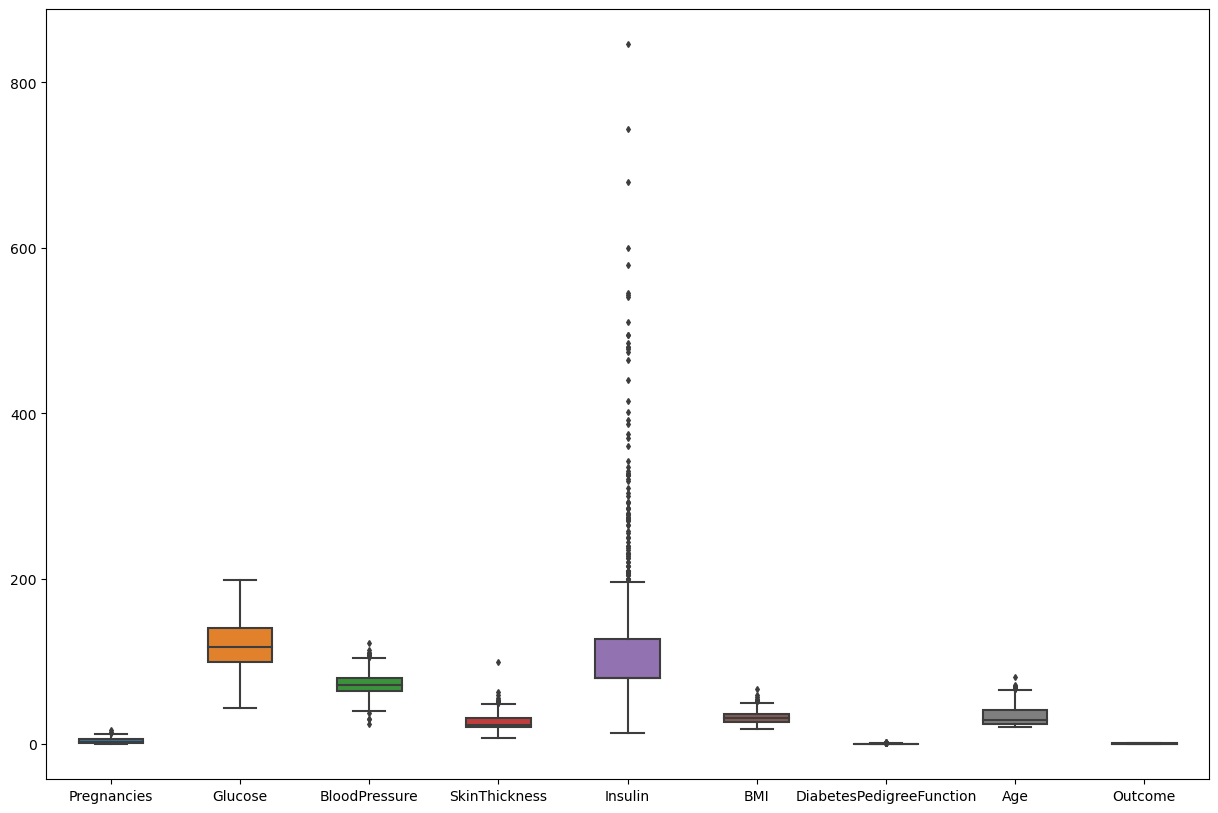

In [9]:
#check with the outliers with the help of boxplot
fig, ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width=0.5, ax=ax, fliersize=3)

In [10]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [11]:
#segregate the dependent and independent variable
X=data.drop(columns=['Outcome'])
y=data['Outcome']

In [13]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=.25,random_state=0)
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [14]:
import pickle
#standard scaling-standardization
def scaler_standard(X_train, X_test):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [15]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [16]:
X_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [17]:
log_reg=LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [20]:
#hyperparameter tuning
#GridSearch CV
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#parameter grid
parameters={ 
'penalty':['l1','l2'],
'C':np.logspace(-3,3,7),
'solver':['newton-cg','lbfg','liblinear'],
}

In [21]:
logreg=LogisticRegression()              #model
                                         #hyperparameter
                                         #metric for scoring,number of folds
        
clf=GridSearchCV(logreg,
                param_grid=parameters,
                scoring='accuracy',
                cv=10)
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfg', 'liblinear']},
             scoring='accuracy')

In [22]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [23]:
clf.best_score_

0.763793103448276

In [24]:
#how well model performs on test dataset.
y_pred=clf.predict(X_test_scaled)

In [25]:
#accuracy=accuracy_score(y_test,y_pred)
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[117,  13],
       [ 26,  36]])

In [26]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [27]:
Accuracy=(true_positive+true_negative)/(true_positive+false_positive+
false_negative+
true_negative)

In [28]:
Accuracy

0.796875

In [29]:
Precision=true_positive/(true_positive+false_positive)
Precision

0.9

In [31]:
Recall=true_positive/(true_positive+false_negative)
Recall

0.8181818181818182

In [32]:
F1_Score=2*(Recall*Precision)/(Precision+Recall)
F1_Score

0.8571428571428572